# Munich AirBnB Data Exploration

### Introduction

The data explored in this notebook was obtained from the Munich Airbnb Open Data Kaggle site. The data contains information about the availability of the listings, the characteristics of the listing and host, and reviews provided by guests staying at the listing for 2019.

It will be explored as part of writing a data science blog post project for Udacity's Data Science Nanodegree. It contains 4 basic elements. 

 - Business Understanding
 - Data Understanding
 - Data Preparation
 - Data Visualization


<img src="files/rathaus-sonne.jpg">

Munich has a population of more than 1.5 million, making it the third-most populous city in Germany. Greater Munich including its suburbs has a population of 2.7 million. The Munich metropolitan region which extends to cities like Augsburg or Ingolstadt had a population of more than 6.0 million in 2017.

Munich, located at the river Isar in the south of Bavaria, is known for its architecture, fine culture, the annual Oktoberfest beer celebration, its vibrant cultural scene and its museums. Although the city was heavily damaged by allied bombing during World War II, many of its historic buildings in the old city center have been rebuilt including its largest church, the Frauenkirche, and the New Town Hall (Neues Rathaus). It's full of culture and beutiful site, It is als perfect base for exploring Southern Germany. Which is home of many beautiful alpine lakes but also some fairytale castles.But many people think of Munich as just the home of Oktoberfest but there’s so much more to see and do in Bavaria’s capital. 

As a resident of Munich the idea of exploring AirBnB data and how Airbnb works in Munich was interesting.


<img src="files/Munich_Banner.jpg">

In [1]:
# Reading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
import calendar
from collections import defaultdict
%matplotlib inline

# Setting pandas display to max so we can see the output for dataset having many columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Business Understanding


When thinking about tourisim or Place to stay anywhere 2 things comes in one mind.

 - AirBnb
 - Booking.com


There are many question pops in one mind but during this project I'll be focusing on following questions.
  
  - Which areas have more listings ?
  - What are average prices in those areas ?
  - Which anamities are important for people ?
  - Is there any co-relation between Review and prices ?
  
As AirBnb data is avaliable on [Keggle](https://www.kaggle.com/chriskue/munich-airbnb-data) i'll be using that for this project.
  

## Data Understanding

With an understanding of the business needs, it is also possible to make some further determinations about what information is appropriate to include as potential features for our model.

### Data Files

Munich dataset includes 3 files.
 
    1. Listing.csv
    2. Calendar.csv
    3. Review.csv
    
#### Listing.csv

That's one of the biggest file include most of the information about the property, host, area, prices etc


#### Calender.csv

It includes listing id and the price availability.

#### Review.csv

It includes detailed comments and unique ids for each comment


### Prepare Data

In [2]:
# Read in datasets
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

C:\Users\jalal\anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
def data_info(df, listing):
    '''
    Description:
    This function is for displaying some dataframe information.
    
    INPUT:
    df - the pandas dataframe we want to explore
    listings - string for writing which dataframe is being used. 

    '''
    df.info()
    print()
    print('dimension of', listing , 'is:' , df.shape)
    print('\n data types of', listing , 'is:')
    print(df.dtypes)

In [4]:
data_info(df_listings, 'listing data frame')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 9.3+ MB

dimension of listing data frame is: (11481, 106)

 data types of listing data frame is:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           obj

In [5]:
data_info(df_calendar, 'calendar data frame')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190565 entries, 0 to 4190564
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 223.8+ MB

dimension of calendar data frame is: (4190565, 7)

 data types of calendar data frame is:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object


In [6]:
data_info(df_reviews , 'reviews data frame')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175562 entries, 0 to 175561
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     175562 non-null  int64 
 1   id             175562 non-null  int64 
 2   date           175562 non-null  object
 3   reviewer_id    175562 non-null  int64 
 4   reviewer_name  175562 non-null  object
 5   comments       175488 non-null  object
dtypes: int64(3), object(3)
memory usage: 8.0+ MB

dimension of reviews data frame is: (175562, 6)

 data types of reviews data frame is:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [7]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt. in the hip and popular area of Glockenbach. Convenient public transport, walking distance to Viktualienmarkt, Marienplatz or Isar river, Gärtnerplatz shopping area and some of the best and coolest restaurants in town.","2-Zimmer Altbauwohung Beste Lage, zentral, im angesagten Glockenbachviertel Beschreibung: 2-Zimmer Altbauwohnung in schönem Stadthaus. 57m2 Ausstattung: Parkettböden, EBK, Bad mit Fenster. komplett möbiliert, Waschmaschine, Spülmaschine Lage: sehr ruhige dennoch super zentrale Lage. Nahe Isar. U-Bahn Sendlinger Tor/Frauenhoferstr, Tram Sendlinger Tor/Müllerstr.","Very quiet, yet centrally located 2 rooms apt. in the hip and popular area of Glockenbach. Convenient public transport, walking distance to Viktualienmarkt, Marienplatz or Isar river, Gärtnerplatz shopping area and some of the best and coolest restaurants in town. 2-Zimmer Altbauwohung Beste Lage, zentral, im angesagten Glockenbachviertel Beschreibung: 2-Zimmer Altbauwohnung in schönem Stadthaus. 57m2 Ausstattung: Parkettböden, EBK, Bad mit Fenster. komplett möbiliert, Waschmaschine, Spülmaschine Lage: sehr ruhige dennoch super zentrale Lage. Nahe Isar. U-Bahn Sendlinger Tor/Frauenhoferstr, Tram Sendlinger Tor/Müllerstr. Glockenbachviertel area has the hippest restaurants, cafes und great shopping with amazing unique boutiques and stores, close to the Viktualienmarkt/Marienplatz/Gärtnerplatz, also close to the river Isar, wonderful walking/jogging routes Convenient public transport, walking distance to Viktualienmarkt, Marienplatz, Gärtnerplatz, U-Bahn Sendlinger Tor/Frauenhoferstr,(U",none,"Glockenbachviertel area has the hippest restaurants, cafes und great shopping with amazing unique boutiques and stores, close to the Viktualienmarkt/Marienplatz/Gärtnerplatz, also close to the river Isar, wonderful walking/jogging routes",NaN,"Convenient public transport, walking distance to Viktualienmarkt, Marienplatz, Gärtnerplatz, U-Bahn Sendlinger Tor/Frauenhoferstr,(U3, U6, U1, U2) Tram Sendlinger Tor/Müllerstr.",NaN,NaN,"Please no smoking in the apartment (there is a balcony where you can smoke), and pl

In [8]:
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,216529,2019-11-25,f,$150.00,$150.00,5,60
1,159634,2019-11-25,f,$53.00,$53.00,14,90
2,159634,2019-11-26,f,$53.00,$53.00,14,90


In [9]:
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,36720,12723661,2014-05-09,11840468,Mikhail,"I would like to thank Gabriella as her apartment really became the home for my stay in Munich. The location is very comfortable, the apartment itself is very cosy so it was a pleasant stay. I would recommend Gabriella's flat as option of living in Munich.\nMikhail, Moscow"
1,36720,13147830,2014-05-20,5466213,Kim,Gabriela's place was absolutely fantastic. It was very spacious and had a really nice kitchen and bathroom. Parts of it were also newly renovated. The bed was the size and comfort level a traveler will enjoy and appreciate after walking around all day. I recommend her place highly and would definitely stay here again!
2,36720,16302574,2014-07-25,2062882,Juan R.,"Quiet place, open to a courtyard, with all the comforts of a home, in the middle of a very lively neighbourhood."


In [10]:
df_calendar.shape[0]/365

11481.0

In [11]:
def price_obj_to_float(df, col):
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].astype(float)
    df.head()

In [12]:
price_obj_to_float(df_listings, 'price')

In [13]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt. in the hip and popular area of Glockenbach. Convenient public transport, walking distance to Viktualienmarkt, Marienplatz or Isar river, Gärtnerplatz shopping area and some of the best and coolest restaurants in town.","2-Zimmer Altbauwohung Beste Lage, zentral, im angesagten Glockenbachviertel Beschreibung: 2-Zimmer Altbauwohnung in schönem Stadthaus. 57m2 Ausstattung: Parkettböden, EBK, Bad mit Fenster. komplett möbiliert, Waschmaschine, Spülmaschine Lage: sehr ruhige dennoch super zentrale Lage. Nahe Isar. U-Bahn Sendlinger Tor/Frauenhoferstr, Tram Sendlinger Tor/Müllerstr.","Very quiet, yet centrally located 2 rooms apt. in the hip and popular area of Glockenbach. Convenient public transport, walking distance to Viktualienmarkt, Marienplatz or Isar river, Gärtnerplatz shopping area and some of the best and coolest restaurants in town. 2-Zimmer Altbauwohung Beste Lage, zentral, im angesagten Glockenbachviertel Beschreibung: 2-Zimmer Altbauwohnung in schönem Stadthaus. 57m2 Ausstattung: Parkettböden, EBK, Bad mit Fenster. komplett möbiliert, Waschmaschine, Spülmaschine Lage: sehr ruhige dennoch super zentrale Lage. Nahe Isar. U-Bahn Sendlinger Tor/Frauenhoferstr, Tram Sendlinger Tor/Müllerstr. Glockenbachviertel area has the hippest restaurants, cafes und great shopping with amazing unique boutiques and stores, close to the Viktualienmarkt/Marienplatz/Gärtnerplatz, also close to the river Isar, wonderful walking/jogging routes Convenient public transport, walking distance to Viktualienmarkt, Marienplatz, Gärtnerplatz, U-Bahn Sendlinger Tor/Frauenhoferstr,(U",none,"Glockenbachviertel area has the hippest restaurants, cafes und great shopping with amazing unique boutiques and stores, close to the Viktualienmarkt/Marienplatz/Gärtnerplatz, also close to the river Isar, wonderful walking/jogging routes",NaN,"Convenient public transport, walking distance to Viktualienmarkt, Marienplatz, Gärtnerplatz, U-Bahn Sendlinger Tor/Frauenhoferstr,(U3, U6, U1, U2) Tram Sendlinger Tor/Müllerstr.",NaN,NaN,"Please no smoking in the apartment (there is a balcony where you can smoke), and pl

### Transform Data

In this section i'll transformed the data in a way which will help me to get the answers of my questions.

In [20]:
def count_vals(df, col1, col2, search):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    searc - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    df_new = defaultdict(int)
    #loop through list of amenities
    for val in search:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                df_new[val] += int(df[col2][idx])
    df_new = pd.DataFrame(pd.Series(df_new)).reset_index()
    df_new.columns = [col1, col2]
    df_new.sort_values('count', ascending=False, inplace=True)
    return df_new

In [21]:
#Empty list for amenities
amenities = []

#appending values in the list.
for amenlity in range(len(df_listings)):
    amenities.append(df_listings['amenities'][amenlity])


In [22]:
#for making anamities consostent through dataset.
amenities = list((s.strip('\'\{\}') for s in amenities))
amenities_string = ",".join(amenities)
amenities = list(set(amenities_string.split(",")))
# Removing none from the list
amenities = filter(None, amenities)

In [23]:

df_amenities = df_listings['amenities'].value_counts().reset_index()
df_amenities.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

df_amenities = count_vals(df_amenities, 'amenities', 'count', amenities)
df_amenities.set_index('amenities', inplace=True)

In [24]:
# Drop nan from review column
df_listings = df_listings.dropna(subset=['review_scores_value'])
df_listings["review_scores_value"].isnull().mean()
df_listings = df_listings[~df_listings["review_scores_value"].isnull()]

### Data Visualisation

Here i answered 2 questions.
 
 -  Which areas have more listings ?
 - What are average prices in those areas ?

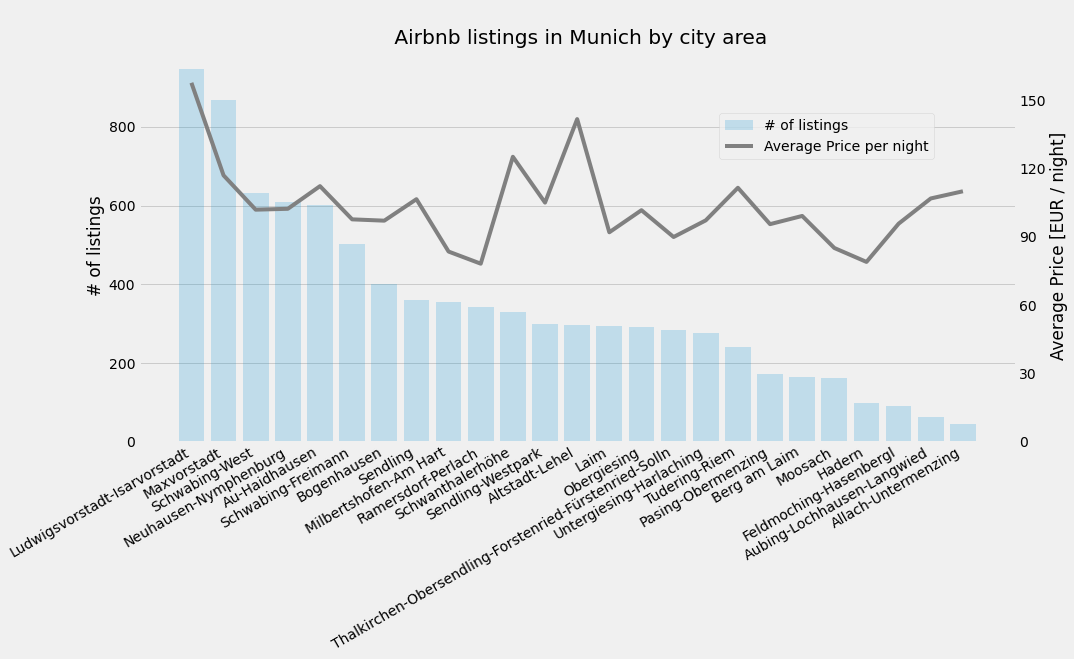

In [25]:
df_listings_avPrice = df_listings.groupby('neighbourhood_cleansed'
                                         ).mean().reset_index()[['neighbourhood_cleansed', 'price']]
df_listings_count = df_listings.groupby('neighbourhood_cleansed'
                                       ).count().rename(columns={'id':'count'})

df_listings_neighbourhood = df_listings_avPrice.merge(df_listings_count,
                                                      on='neighbourhood_cleansed', how='inner')
df_listings_neighbourhood.sort_values('count', ascending = False, inplace = True)

# do the plot
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots(figsize=(14,8))
fig.autofmt_xdate()   # rotate text on x-axis

ax2 = ax1.twinx()  # set up the 2nd axis for the pricing plot

ax2.plot(df_listings_neighbourhood['neighbourhood_cleansed'], df_listings_neighbourhood['price_x'], color = "grey") # plot average price as line
ax1.bar(df_listings_neighbourhood['neighbourhood_cleansed'],df_listings_neighbourhood['count'], 
        width=0.8, alpha=0.2) # plot # of listings as bar chart

fig.legend(['# of listings', 'Average Price per night'], fontsize = 14, loc='upper center', 
           bbox_to_anchor=(0.57, 0.46, 0.5, 0.5))

ax2.grid(b=False) # turn off grid #2

ax1.set_title('\n Airbnb listings in Munich by city area')
ax2.set_ylabel('Average Price [EUR / night]')
ax1.set_ylabel('# of listings');
ax1.tick_params(axis='x', grid_linewidth = 0)
ax2.set_ylim(0,172)
ax2.set_yticks(np.arange(0,160,30));

 - 

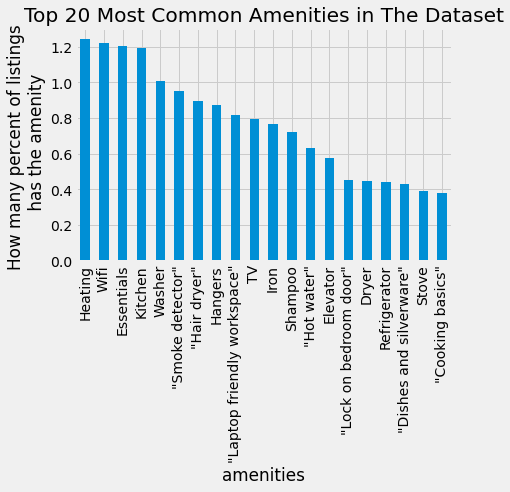

In [26]:
#Finding most common amenities
(df_amenities/len(df_listings))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings \n has the amenity')
plt.show()

 - Which anamities are important for people ?

C:\Users\jalal\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


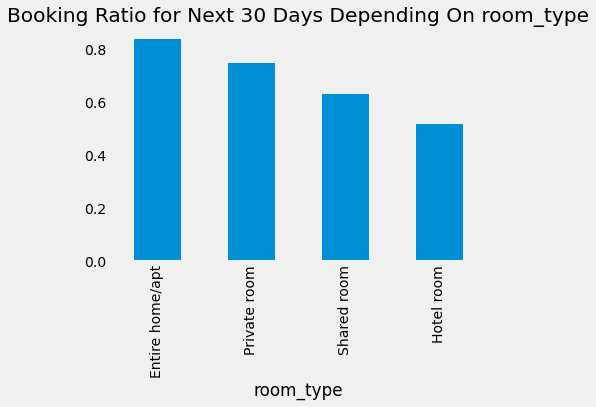

In [27]:
df_listings['booking_30'] = 1 - (df_listings['availability_30']/30)
(df_listings.groupby(['room_type'])['booking_30'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None)
plt.title('Booking Ratio for Next 30 Days Depending On room_type');
ax3 = plt.axes()
ax3.grid(False)
plt.show()

 - Is there any co-relation between Review and prices ?

In [28]:
df_listings[['price','review_scores_value']].head(30)

,price,review_scores_value
0,95.0,9.0
1,80.0,9.0
2,95.0,9.0
3,120.0,10.0
5,55.0,9.0
6,55.0,10.0
7,65.0,9.0
8,55.0,10.0
9,54.0,9.0
10,67.0,10.0


C:\Users\jalal\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


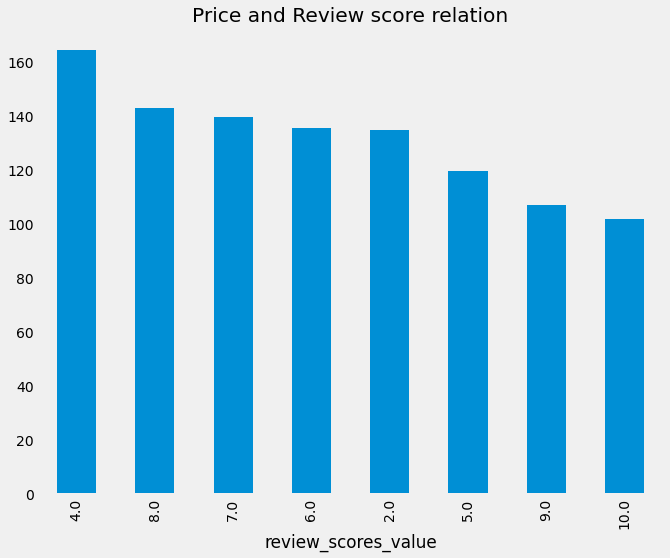

In [35]:
(df_listings.groupby(['review_scores_value'])['price'].mean().sort_values(ascending=False)).plot(kind='bar', legend=None, 
                                                                                                 figsize = (10,8))
plt.title('Price and Review score relation');
ax3 = plt.axes()
ax3.grid(False)
plt.show()

## Conclusion

The above visualisations helps me to understand which areas are famous for staying in the city as we see the areas with maximum listing are Ludwigvorstadt and Maxvorstadt. These areas are closer to center of city. But at the same time the price for these areas are higher than others. Most tourists or other people look for amenities like Wifi and heating. On Airbnb booking ration for entire apartment is more than the private rooms or hotel rooms. There'S an interesting relation between review score and price. Place with medium rent have good average review score. 

**P.S: As the dataset is pre covid so current sitution effected this industury badly. Due to current rules apartment can be booked for a month**